In [78]:
from scipy import fftpack 
import numpy as np
import matplotlib.pyplot as plt
import imageio as io
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False
import glob
import os
import ncempy.io as emio

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
path = '/home/duncan/Documents/Data/MJF_TiSnO3_ALD/2021-06-29_(S)TEM/x-ray/'
# for impath in glob.glob(path+'*.tif'):
#     name = os.path.basename(impath)[:-4]
#     im = io.imread(impath)
# #     print(im)
#     io.imsave(path+name+'.png',im)
    
# for impath in sorted(glob.glob(path+'*.jpg'))[4:]:
#     name = os.path.basename(impath)
#     im = io.imread(impath)[:,:,0]
#     imt = im[:900,:]
#     imb = im[900:,:]
    
#     #top
#     ffttop = np.log10(np.fft.fftshift(fftpack.fft2(imt)))
#     #bottom
#     fftbot = np.log10(np.fft.fftshift(fftpack.fft2(imb)))
    
#     #all four
#     fig,ax = plt.subplots(2, 2, dpi=200, figsize=(9,7), gridspec_kw={'width_ratios': [2, 1]})
    
#     ax[0][0].imshow(imt, cmap="gist_gray")
#     ax[1][0].imshow(imb, cmap="gist_gray")
#     ax[0][1].imshow(abs(ffttop), cmap="gist_gray")
#     ax[1][1].imshow(abs(fftbot), cmap="gist_gray")
    
#     ax[0][0].set_title("top half")
#     ax[1][0].set_title("bottom half")
#     ax[0][1].set_title("FFT top")
#     ax[0][1].set_aspect(2)
#     ax[1][1].set_title("FFT bot")
#     ax[1][1].set_aspect(2)
    
#     fig.suptitle(f"{name}")
#     plt.show()
#     plt.close(fig)

In [12]:
impath = '/home/duncan/Documents/Data/MJF_TiSnO3_ALD/2021-06-29_(S)TEM/2021_06_29/STEM/TiSnO3_ROI_8_HAADF_490mm_spot 9_01.tif'
name = os.path.basename(impath)[:-4]
im = io.imread(impath)
io.imsave("/home/duncan/Documents/Data/MJF_TiSnO3_ALD/2021-06-29_(S)TEM/2021_06_29/STEM/"+name+'.png',im)

# False color map EDX data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Sn
Ti
Si


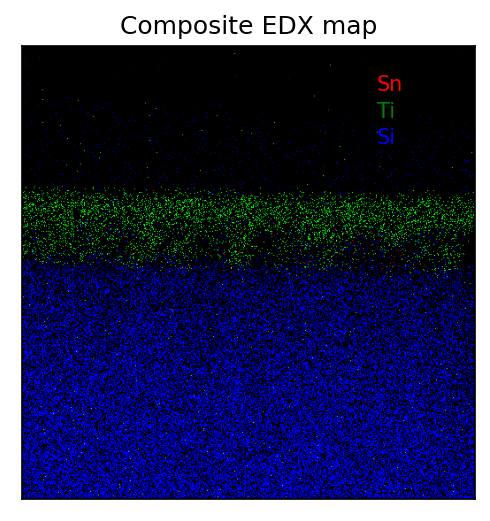

In [48]:
impath = '/home/duncan/Documents/Data/MJF_TiSnO3_ALD/2021-06-29_STEM/x-ray/maps/'
composite = []
refchan = []
colors = ['r','g','b']
for idx, path in enumerate(glob.glob(impath+'*.tif')):
    element = os.path.basename(path).split(" ")[-1][:-4]
    print(element)
    im = np.sum(io.imread(path),axis=2)[:512,:]
    composite.append(im)
    refchan.append(element)
composite = np.stack(composite,axis=2)
plt.figure(dpi=150)
plt.imshow(composite)
plt.title('Composite EDX map')
for idx, c in enumerate(refchan):
    plt.text(400,50+30*idx,c,fontdict={'color':  colors[idx]})
plt.xticks([])
plt.yticks([])
plt.savefig(path+'EDX_composite_cations.png')

# Point EDX analysis

Dark_Band_Spectrum_04.txt
Shoe_Arch_Spectrum_03.txt
Sn_Spectra.txt


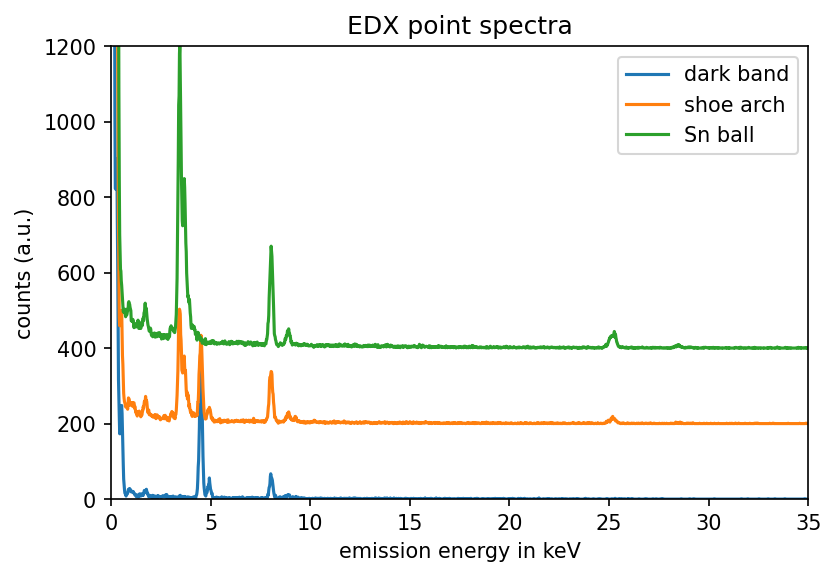

In [77]:
path = '/home/duncan/Documents/Data/MJF_TiSnO3_ALD/2021-06-29_STEM/x-ray/point _spectra/'
fig,ax = plt.subplots(dpi=150)
for idx,file in enumerate(glob.glob(path+'*.txt')):
    print(os.path.basename(file))
    raw = np.genfromtxt(file,skip_header=41, delimiter=",",dtype=float)
    keV = raw[:,0]
    cnts = raw[:,1]
    ax.plot(keV,cnts+200*idx)
ax.set_ylim(0,1200)
ax.set_xlim(0,35)
ax.set_xlabel('emission energy in keV')
ax.set_ylabel('counts (a.u.)')
ax.legend(['dark band','shoe arch', 'Sn ball'])
ax.set_title('EDX point spectra')
fig.savefig(path+'EDX_point_spectra_summary.png')

# HRTEM data
- ROI 04 shows good lattice on a couple of areas

0.034635484
181.4089061819973


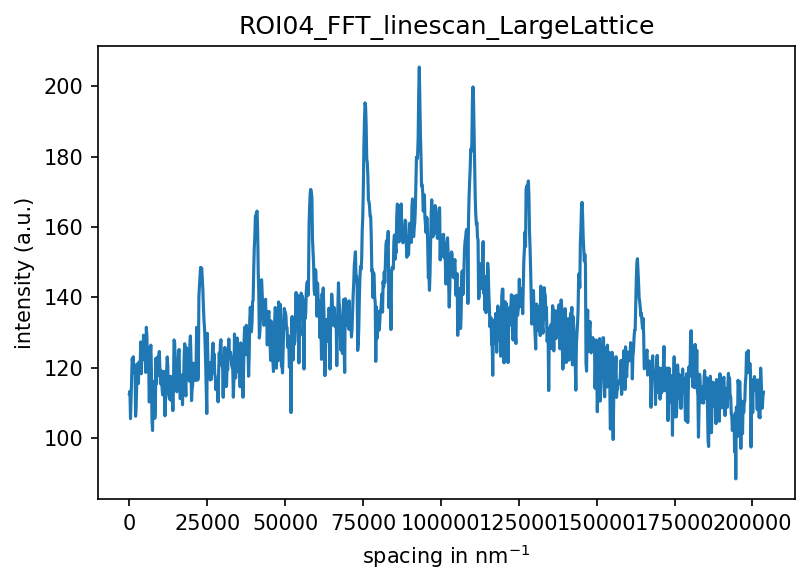

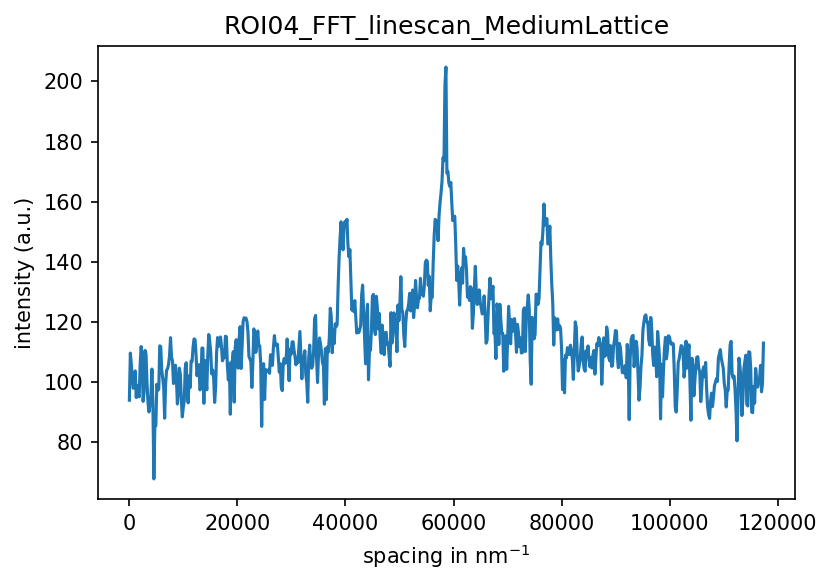

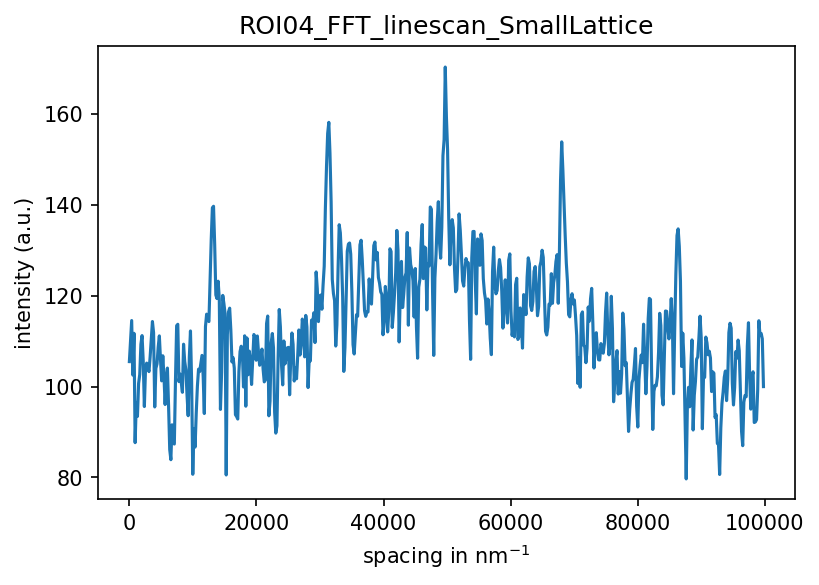

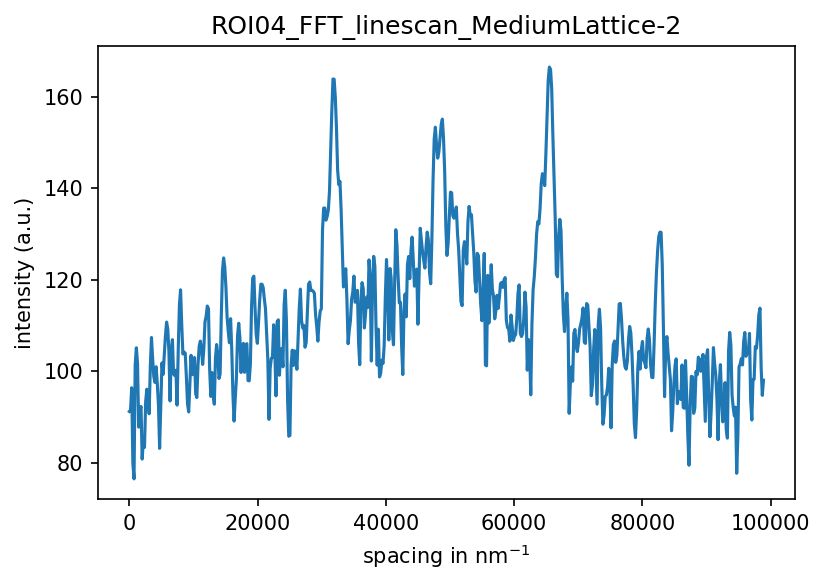

In [97]:
path = '/home/duncan/Documents/Data/MJF_TiSnO3_ALD/2021-06-29_STEM/2021_06_29/'
imdata = emio.read('/home/duncan/Documents/Data/MJF_TiSnO3_ALD/2021-06-29_STEM/2021_06_29/TiSnO3_ROI_04_MedMag_185kx.dm3')
image = imdata['data']
pxs = imdata['pixelSize'][0] # in nm??
fftpxs = 2*np.pi/pxs  # in nm ^-1
print(pxs)
print(fftpxs)
for file in glob.glob(path+'*.csv'):
    name = os.path.basename(file)[:-4]
    raw = np.genfromtxt(file,delimiter=',',skip_header=1)
    fftpixel = raw[:,0]*fftpxs
    Intensity = raw[:,1]
    
    fig,ax = plt.subplots(dpi=150)
    ax.plot(fftpixel,Intensity)
    ax.set_title(name)
    ax.set_xlabel('spacing in nm$^{-1}$')
    ax.set_ylabel('intensity (a.u.)')
    plt.show(fig)
    plt.close(fig)

In [99]:
latspa = [1.18,0.75,0.35,0.27]
q=[]
for d in latspa:
    q.append(2*np.pi/d)
q

[5.324733311169141, 8.377580409572781, 17.951958020513104, 23.271056693257727]

In [100]:
path = '/home/duncan/Documents/Data/MJF_Ta2SnO6_ALD/2021-07-02_F20_STEM/2021-07-02/HRTEM/'
for file in glob.glob(path+"*.dm3"):
    name = os.path.basename(file)[:-4]
    imid = emio.read(file)
    io.imwrite(path+name+'.png',imid['data'])

Lossy conversion from float32 to uint8. Range [9.893354415893555, 3108.014892578125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [771.5525512695312, 3569.787841796875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-298.0838623046875, 2948.268798828125]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [409.6889953613281, 3209.830810546875]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-542.741943359375, 2871.650146484375]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-602.5578002929688, 2816.5322265625]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [-84.83133697509766, 3212.624267578125]. Convert

In [103]:
2*np.pi/21



0.2991993003418851